In [ ]:
#Description : this program attemps to optimize a users portfolio using the Efficient Frontier



In [2]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock symbols/ tickers in the portfolio
#FAANG 

assets = ['BVT.JO', 'BTI.JO', 'CFR.JO', 'IMP.JO', 'SUR.JO', 'ADI.JO', 'APN.JO', 'CLH.JO', 'IPF.JO', 'ITE.JO', 'MTH.JO', 'PPE.JO', 'RMH.JO', 'S32.JO', 'SSS.JO', 'AIL.JO','MST.JO']

In [ ]:
# #Get the stock symbols/ tickers in the portfolio
# #FAANG 

# assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', ]

In [4]:
#Assign weights to the stocks.
weights = np.array([0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.057, 0.056, 0.056, 0.056, 0.056]) #20 percent each

In [ ]:
# #Assign weights to the stocks.
# weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #20 percent each

In [5]:
#Get the stock/portfolio starting date
stockStartDate = '2012-01-01'

In [6]:
#Get the stock stocks ending date (date)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-04-19'

In [7]:
#create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into df 
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [8]:
#Show the df
df

,BVT.JO,BTI.JO,CFR.JO,IMP.JO,SUR.JO,ADI.JO,APN.JO,CLH.JO,IPF.JO,ITE.JO,MTH.JO,PPE.JO,RMH.JO,S32.JO,SSS.JO,AIL.JO,MST.JO
Date,,,,,,,,,,,,,,,,,
2012-01-02,2189.546387,27919.052734,3427.064697,15150.517578,991.839478,87.037827,9050.896484,1213.786377,519.867371,343.437317,NaN,24.662146,1.726872e-08,NaN,NaN,NaN,413.115265
2012-01-03,2242.163818,28028.988281,3582.573242,15356.024414,979.204468,83.521149,9277.450195,1215.370972,519.867371,343.437317,NaN,24.662146,1.750908e-08,NaN,NaN,NaN,427.869446
2012-01-04,2246.124512,28174.589844,3572.486328,15480.958008,979.204468,83.521149,9256.854492,1220.124634,548.979980,343.437317,NaN,23.811729,1.761661e-08,NaN,NaN,NaN,416.803833
2012-01-05,2263.097412,27998.406250,3548.109131,15435.692383,979.204468,77.366959,9268.087891,1212.359985,548.979980,343.437317,NaN,23.811729,1.778742e-08,NaN,NaN,NaN,416.066132
2012-01-06,2304.257812,27850.617188,3530.456787,15664.739258,979.204468,73.850296,9394.471680,1213.786377,548.979980,343.437317,NaN,23.811729,1.801513e-08,NaN,NaN,NaN,414.590668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-13,17307.000000,55732.000000,14748.000000,27795.000000,2100.000000,650.000000,14714.000000,414.000000,950.477966,1664.000000,9531.0,112.000000,1.950000e+02,3177.0,1324.0,409.0,962.000000
2021-04-14,17618.000000,55047.000000,15102.000000,27365.000000,2160.000000,650.000000,14600.000000,425.000000,965.000000,1679.000000,9846.0,120.000000,1.960000e+02,3197.0,1365.0,410.0,975.000000
2021-04-15,17563.000000,55182.000000,14858.000000,27475.000000,2140.000000,650.000000,14865.000000,420.000000,993.000000,1695.000000,9407.0,124.000000,1.960000e+02,3252.0,1357.0,410.0,964.000000


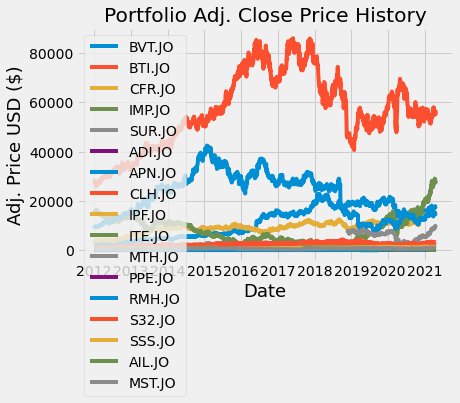

In [9]:
# visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()

In [10]:
#Show the daily simply return
returns = df.pct_change()
returns

,BVT.JO,BTI.JO,CFR.JO,IMP.JO,SUR.JO,ADI.JO,APN.JO,CLH.JO,IPF.JO,ITE.JO,MTH.JO,PPE.JO,RMH.JO,S32.JO,SSS.JO,AIL.JO,MST.JO
Date,,,,,,,,,,,,,,,,,
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,0.024031,0.003938,0.045377,0.013564,-0.012739,-0.040404,0.025031,0.001305,0.000000,0.000000,NaN,0.000000,0.013919,NaN,NaN,NaN,0.035714
2012-01-04,0.001766,0.005195,-0.002816,0.008136,0.000000,0.000000,-0.002220,0.003911,0.056000,0.000000,NaN,-0.034483,0.006141,NaN,NaN,NaN,-0.025862
2012-01-05,0.007557,-0.006253,-0.006824,-0.002924,0.000000,-0.073684,0.001214,-0.006364,0.000000,0.000000,NaN,0.000000,0.009696,NaN,NaN,NaN,-0.001770
2012-01-06,0.018188,-0.005278,-0.004975,0.014839,0.000000,-0.045454,0.013636,0.001177,0.000000,0.000000,NaN,0.000000,0.012802,NaN,NaN,NaN,-0.003546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-13,-0.001903,-0.004857,0.013887,0.010727,0.000000,0.015625,-0.005744,-0.021277,-0.014852,0.020233,0.024839,0.046729,0.026316,-0.002512,-0.006006,0.000000,-0.012320
2021-04-14,0.017970,-0.012291,0.024003,-0.015470,0.028571,0.000000,-0.007748,0.026570,0.015279,0.009014,0.033050,0.071429,0.005128,0.006295,0.030967,0.002445,0.013514
2021-04-15,-0.003122,0.002452,-0.016157,0.004020,-0.009259,0.000000,0.018151,-0.011765,0.029016,0.009529,-0.044587,0.033333,0.000000,0.017204,-0.005861,0.000000,-0.011282


In [11]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,BVT.JO,BTI.JO,CFR.JO,IMP.JO,SUR.JO,ADI.JO,APN.JO,CLH.JO,IPF.JO,ITE.JO,MTH.JO,PPE.JO,RMH.JO,S32.JO,SSS.JO,AIL.JO,MST.JO
BVT.JO,0.085619,0.002973,0.012837,0.028644,0.009153,0.008122,0.029820,0.024335,0.022364,0.004087,0.097362,0.011492,0.039803,-0.464338,0.020666,-1.057534,0.005003
BTI.JO,0.002973,0.054134,0.018939,0.006432,0.003778,0.001844,0.009096,0.007331,0.001945,-0.001794,-0.004561,-0.005905,0.012652,0.088275,0.000820,0.282548,0.004436
CFR.JO,0.012837,0.018939,0.065880,0.028530,0.006179,0.005033,0.012086,0.011805,0.007401,0.004366,0.053212,0.003049,-0.029901,-0.506203,0.009284,-1.725040,0.005571
IMP.JO,0.028644,0.006432,0.028530,0.276438,0.016274,0.008189,0.023342,0.036226,0.020804,0.001122,0.150505,0.011271,-0.067347,-0.310927,0.026041,-0.431561,0.007954
SUR.JO,0.009153,0.003778,0.006179,0.016274,0.108630,0.008137,0.003422,0.020040,0.007812,0.002074,0.053058,0.005713,-0.066824,-0.602886,0.008730,-0.822365,0.004542
ADI.JO,0.008122,0.001844,0.005033,0.008189,0.008137,0.305931,0.006222,0.007565,0.007776,0.006455,0.029898,-0.009525,0.299389,0.076420,0.000709,0.834162,0.000988
APN.JO,0.029820,0.009096,0.012086,0.023342,0.003422,0.006222,0.115126,0.015926,0.013215,0.003570,0.066476,0.010636,0.052101,-0.242760,0.014960,-0.504924,0.002972
CLH.JO,0.024335,0.007331,0.011805,0.036226,0.020040,0.007565,0.015926,0.176733,0.023774,0.008045,0.129412,0.015774,-0.019137,-0.454317,0.015283,-0.676258,0.003173
IPF.JO,0.022364,0.001945,0.007401,0.020804,0.007812,0.007776,0.013215,0.023774,0.098696,0.007205,0.099061,-0.001514,0.032903,-0.583103,0.022671,-0.998337,0.003228
ITE.JO,0.004087,-0.001794,0.004366,0.001122,0.002074,0.006455,0.003570,0.008045,0.007205,0.107536,0.010271,0.004245,0.026430,0.298685,0.004362,0.257852,0.001096


In [12]:
#Create the portfol variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

49.98855952404871

In [13]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

7.07025880177301

In [14]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

5.579277722888726

In [15]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str( round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100 ) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility / risk: '+ percent_vols)
print('Annual variance: '+  percent_var)

Expected annual return: 558.0%
Annual volatility / risk: 707.0%
Annual variance: 4999.0%


In [24]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [16]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [17]:
#Portfolio Optimization !

#Calculate the expected returns and the annualised sample covariance matrixof asset returns
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)


#Optimize for max sharpe ratio 
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('BVT.JO', 0.26312), ('BTI.JO', 0.05862), ('CFR.JO', 0.19734), ('IMP.JO', 0.0), ('SUR.JO', 0.02657), ('ADI.JO', 0.06992), ('APN.JO', 0.0), ('CLH.JO', 0.0), ('IPF.JO', 0.0), ('ITE.JO', 0.17692), ('MTH.JO', 0.0), ('PPE.JO', 0.03935), ('RMH.JO', 0.01046), ('S32.JO', 0.0), ('SSS.JO', 0.11259), ('AIL.JO', 0.0), ('MST.JO', 0.04504)])
Expected annual return: 29.2%
Annual volatility: 19.1%
Sharpe Ratio: 1.43


(0.2923619844268094, 0.19050350356832801, 1.429695408877985)

In [ ]:
#Highlight total  copy and paste and must add to 1 



In [42]:
#Prices two commos ahead eg R1089.00 = R189.00,  (10000000 = 100000)
#Get the discrete alloacation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 10000000)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: R{:.2f}'.format(leftover))

Discrete allocation: {'BVT.JO': 150, 'BTI.JO': 10, 'CFR.JO': 132, 'SUR.JO': 127, 'ADI.JO': 1075, 'ITE.JO': 1011, 'PPE.JO': 3027, 'RMH.JO': 540, 'SSS.JO': 824, 'MST.JO': 465}
Funds remaining: R10896.00
